In [ ]:
df['zscore'] = (df.a - df.a.mean())/df.a.std(ddof=0)

In [4]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
import seaborn as sns

In [5]:
df=pd.read_csv("air.csv",sep=",",index_col=[0])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Booking_ID                   200000 non-null  uint64 
 1   Trip_Type                    200000 non-null  object 
 2   Departure_Airport_Code       200000 non-null  object 
 3   Arrival_Airport_Code         200000 non-null  object 
 4   Leisure_Ethnic               200000 non-null  object 
 5   Origin_Destination           200000 non-null  object 
 6   BookingDate                  200000 non-null  object 
 7   Departure_Date_Utc_Outgoing  200000 non-null  object 
 8   Arrive_Date_Utc_Outgoing     200000 non-null  object 
 9   Agent_Category               200000 non-null  object 
 10  Airline_Code                 200000 non-null  object 
 11  Adult_Traveller              200000 non-null  int64  
 12  Child_Traveller              200000 non-null  int64  
 13 

In [7]:
df.head()

,Booking_ID,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender
0,1295006225575372115,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male
1,13282432446787388558,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male
2,2551456876080630947,OneWay,ADB,MUC,Ethnic,Destination_To_Origin,2021-08-24 02:40:55.867,2021-09-11 05:10:00,2021-09-11 07:55:00,B2C,XC,2,0,0,393.98,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,İzmir,Turkey,Munich,Germany,23,Turkey,Male
3,1831885656060181421,OneWay,TFS,CGN,Leisure,Destination_To_Origin,2021-10-11 21:53:35.860,2021-12-10 10:40:00,2021-12-10 15:10:00,B2C,XR,1,0,0,95.99,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,Tenerife,Spain,Cologne,Germany,52,Germany,Female
4,15621418418435562991,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Booking_ID                   200000 non-null  uint64 
 1   Trip_Type                    200000 non-null  object 
 2   Departure_Airport_Code       200000 non-null  object 
 3   Arrival_Airport_Code         200000 non-null  object 
 4   Leisure_Ethnic               200000 non-null  object 
 5   Origin_Destination           200000 non-null  object 
 6   BookingDate                  200000 non-null  object 
 7   Departure_Date_Utc_Outgoing  200000 non-null  object 
 8   Arrive_Date_Utc_Outgoing     200000 non-null  object 
 9   Agent_Category               200000 non-null  object 
 10  Airline_Code                 200000 non-null  object 
 11  Adult_Traveller              200000 non-null  int64  
 12  Child_Traveller              200000 non-null  int64  
 13 

In [9]:
df.isnull().sum().sort_values(ascending=False).head()

Arrive_Date_Utc_Incoming       6
Departure_Date_Utc_Incoming    6
Booking_ID                     0
Infant_Traveller               0
Country                        0
dtype: int64

In [10]:
#incelenmek üzere iki Na değerimiz var

In [11]:
df.duplicated().sum()

0

In [12]:
if df["Booking_ID"].nunique()==len(df["Booking_ID"]):
    df.drop(["Booking_ID"],axis=1,inplace=True)

In [13]:
df.head()

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender
0,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male
1,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male
2,OneWay,ADB,MUC,Ethnic,Destination_To_Origin,2021-08-24 02:40:55.867,2021-09-11 05:10:00,2021-09-11 07:55:00,B2C,XC,2,0,0,393.98,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,İzmir,Turkey,Munich,Germany,23,Turkey,Male
3,OneWay,TFS,CGN,Leisure,Destination_To_Origin,2021-10-11 21:53:35.860,2021-12-10 10:40:00,2021-12-10 15:10:00,B2C,XR,1,0,0,95.99,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,Tenerife,Spain,Cologne,Germany,52,Germany,Female
4,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male


In [14]:
df[df["Arrive_Date_Utc_Incoming"].isna()] ## Büyük ihtimalle uçağını kaçıran ya da erken dönen yolcular

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender
31674,RoundTrip,BRU,TFS,Leisure,Origin_To_Destination,2021-10-04 16:50:16.657,2022-01-02 07:00:00,2022-01-02 10:55:00,B2C,XR,2,0,0,179.02,NaN,NaN,174.94,Brussels,Belgium,Tenerife,Spain,34,Belgium,Male
73483,RoundTrip,VIE,HER,Leisure,Origin_To_Destination,2021-05-20 12:46:05.653,2021-09-15 09:00:00,2021-09-15 11:30:00,Operator,XR,2,0,0,265.98,NaN,NaN,241.98,Viyana,Austria,Heraklion,Greece,66,Austria,Male
124815,RoundTrip,BRU,TFS,Leisure,Origin_To_Destination,2021-09-27 22:29:27.020,2022-01-02 07:00:00,2022-01-02 10:55:00,B2C,XR,2,0,0,179.02,NaN,NaN,93.94,Brussels,Belgium,Tenerife,Spain,34,Belgium,Male
136572,RoundTrip,BRU,TFS,Leisure,Origin_To_Destination,2021-11-21 15:16:45.483,2021-12-19 07:00:00,2021-12-19 11:35:00,OTA,XR,2,0,0,141.98,NaN,NaN,141.98,Brussels,Belgium,Tenerife,Spain,61,Belgium,Male
164814,RoundTrip,BRU,AYT,Leisure,Origin_To_Destination,2021-12-31 11:42:52.163,2022-05-03 14:00:00,2022-05-03 17:50:00,B2C,XC,6,1,1,369.16,NaN,NaN,333.21,Brussels,Belgium,Antalya,Turkey,41,France,Female
176587,RoundTrip,BRU,TFS,Leisure,Origin_To_Destination,2021-10-08 11:47:45.980,2021-11-21 07:00:00,2021-11-21 11:35:00,B2C,XR,2,0,0,179.02,NaN,NaN,23.52,Brussels,Belgium,Tenerife,Spain,55,Belgium,Male


In [15]:
for column in df.select_dtypes("object").columns:
        calculation=(len(df[column])-df[column].nunique())/len(df[column])*100   #If the difference of uniq values from the data set is greater than 90 percent, we should qualify it as Categorical.
        if calculation>90 :
             df[column]=df[column].astype("category")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Trip_Type                    200000 non-null  category
 1   Departure_Airport_Code       200000 non-null  category
 2   Arrival_Airport_Code         200000 non-null  category
 3   Leisure_Ethnic               200000 non-null  category
 4   Origin_Destination           200000 non-null  category
 5   BookingDate                  200000 non-null  object  
 6   Departure_Date_Utc_Outgoing  200000 non-null  object  
 7   Arrive_Date_Utc_Outgoing     200000 non-null  object  
 8   Agent_Category               200000 non-null  category
 9   Airline_Code                 200000 non-null  category
 10  Adult_Traveller              200000 non-null  int64   
 11  Child_Traveller              200000 non-null  int64   
 12  Infant_Traveller             200000 non-null

In [17]:
for column in df.select_dtypes("object").columns:
    df[column]=pd.to_datetime(df[column])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip_Type                    200000 non-null  category      
 1   Departure_Airport_Code       200000 non-null  category      
 2   Arrival_Airport_Code         200000 non-null  category      
 3   Leisure_Ethnic               200000 non-null  category      
 4   Origin_Destination           200000 non-null  category      
 5   BookingDate                  200000 non-null  datetime64[ns]
 6   Departure_Date_Utc_Outgoing  200000 non-null  datetime64[ns]
 7   Arrive_Date_Utc_Outgoing     200000 non-null  datetime64[ns]
 8   Agent_Category               200000 non-null  category      
 9   Airline_Code                 200000 non-null  category      
 10  Adult_Traveller              200000 non-null  int64         
 11  Child_Traveller           

In [19]:
df.describe()

,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Amount_Total_Incoming,Age
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000
mean,1.725985,0.246420,0.037750,217.750155,102.102647,42.60539
std,1.130145,0.625307,0.197345,211.894616,191.137555,14.99644
min,0.000000,0.000000,0.000000,-24.570000,-74.060000,0.00000
25%,1.000000,0.000000,0.000000,87.980000,0.000000,30.00000
50%,1.000000,0.000000,0.000000,151.990000,0.000000,41.00000
75%,2.000000,0.000000,0.000000,270.400000,140.700000,54.00000
max,68.000000,6.000000,3.000000,17868.360000,7080.000000,122.00000


In [20]:
df["Adult_Traveller"].sort_values(ascending=False).head(10) #Kafile ile gidenler olabilir

138080    68
41325     65
104136    64
64414     63
30652     52
150332    45
82758     45
124841    41
62179     40
190515    39
Name: Adult_Traveller, dtype: int64

In [21]:
df["Age"].sort_values(ascending=False).iloc[np.r_[0:5, -5:0]] #0 yaşındaki outlier

187718    122
22695     122
80560     117
15110     101
90832     101
82248       1
8610        1
98590       1
185282      1
156450      0
Name: Age, dtype: int64

In [22]:
df["Amount_Total_Incoming"].value_counts()

0.00       117033
75.44         352
37.64         309
39.44         274
52.94         267
            ...  
365.84          1
548.12          1
1211.45         1
154.47          1
239.16          1
Name: Amount_Total_Incoming, Length: 30288, dtype: int64

In [23]:
df["Amount_Total_Incoming"].sort_values(ascending=False).iloc[np.r_[0:10, -40:0]]

104136    7080.00
130019    7019.15
64414     6300.00
124841    5740.00
82758     5660.00
190515    5635.69
54226     4940.00
129612    4800.00
58922     4500.00
150332    4275.00
84337        0.00
84336        0.00
84340        0.00
84341        0.00
84364        0.00
84366        0.00
84369        0.00
84377        0.00
84378        0.00
84381        0.00
84383        0.00
84386        0.00
84391        0.00
84394        0.00
84395        0.00
84396        0.00
84397        0.00
84398        0.00
84400        0.00
84361        0.00
84359        0.00
84358        0.00
84357        0.00
84342        0.00
84344        0.00
84345        0.00
84346        0.00
84347        0.00
84348        0.00
84349        0.00
84351        0.00
84353        0.00
84354        0.00
84356        0.00
199999       0.00
187929      -0.86
78092       -5.70
72158       -6.63
60615      -39.77
16120      -74.06
Name: Amount_Total_Incoming, dtype: float64

In [24]:
df[df["Amount_Total_Incoming"]>4000]

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender
54226,RoundTrip,GRZ,HRG,Leisure,Origin_To_Destination,2021-11-18 15:22:00,2022-04-30 07:45:00,2022-04-30 11:25:00,B2C,XR,37,0,0,4699.00,2022-05-07 02:30:00,2022-05-07 06:50:00,4940.00,GraZ,Austria,Hurghada,Egypt,26,Turkey,Male
58922,RoundTrip,ZRH,HER,Leisure,Origin_To_Destination,2021-11-15 19:17:00,2022-10-08 15:20:00,2022-10-08 18:10:00,B2C,XR,30,0,0,4500.00,2022-10-15 11:15:00,2022-10-15 14:20:00,4500.00,Zurich,Switzerland,Heraklion,Greece,26,Turkey,Male
64414,RoundTrip,FMO,PMI,Leisure,Origin_To_Destination,2021-10-20 12:13:00,2022-08-25 04:40:00,2022-08-25 07:05:00,B2C,XR,63,0,0,6481.44,2022-08-28 08:05:00,2022-08-28 10:30:00,6300.00,Munster,Germany,Palma De Mallorca,Spain,26,Turkey,Male
72580,RoundTrip,KTW,AYT,Leisure,Origin_To_Destination,2021-12-29 15:25:00,2022-02-12 07:50:00,2022-02-12 10:35:00,B2B,XC,34,0,0,3400.00,2022-02-26 04:00:00,2022-02-26 06:50:00,4080.00,Katowice,Poland,Antalya,Turkey,26,Albania,Male
82758,RoundTrip,DUS,AYT,Leisure,Origin_To_Destination,2021-08-27 15:48:00,2021-10-29 11:20:00,2021-10-29 14:55:00,B2C,XC,45,2,1,4250.00,2021-11-05 04:00:00,2021-11-05 07:50:00,5660.00,Düsseldorf,Germany,Antalya,Turkey,26,Turkey,Male
104136,RoundTrip,KTW,AYT,Leisure,Origin_To_Destination,2021-05-14 14:00:00,2021-06-05 06:35:00,2021-06-05 11:30:00,B2C,XC,64,0,2,6635.00,2021-06-12 02:55:00,2021-06-12 05:45:00,7080.00,Katowice,Poland,Antalya,Turkey,2,Czech Republic,Male
124841,RoundTrip,NUE,AYT,Leisure,Origin_To_Destination,2021-11-05 09:06:00,2022-03-02 03:25:00,2022-03-02 06:35:00,B2C,XC,41,0,0,4510.00,2022-03-06 07:30:00,2022-03-06 10:50:00,5740.00,Nuremberg,Germany,Antalya,Turkey,26,Turkey,Male
129612,RoundTrip,GRZ,HRG,Leisure,Origin_To_Destination,2021-11-18 09:33:00,2022-04-23 07:45:00,2022-04-23 11:25:00,B2C,XR,30,0,0,5160.00,2022-04-30 02:30:00,2022-04-30 06:45:00,4800.00,GraZ,Austria,Hurghada,Egypt,26,Turkey,Male
130019,RoundTrip,BRU,HRG,Leisure,Origin_To_Destination,2022-03-09 11:49:00,2022-09-24 05:00:00,2022-09-24 10:00:00,B2C,XR,28,0,0,7000.00,2022-10-08 11:00:00,2022-10-08 16:15:00,7019.15,Brussels,Belgium,Hurghada,Egypt,25,Turkey,Male
150332,RoundTrip,KTW,AYT,Leisure,Origin_To_Destination,2021-07-22 12:22:00,2021-08-21 06:20:00,2021-08-21 06:20:00,B2C,XC,45,0,0,4275.00,2021-08-28 02:30:00,2021-08-28 05:20:00,4275.00,Katowice,Poland,Antalya,Turkey,26,Turkey,Male


In [25]:
df["Amount_Total_Outgoing"].sort_values(ascending=False).iloc[np.r_[0:5, -25:0]]

138080    17868.36
30652     11064.04
41325      8313.50
130019     7000.00
104136     6635.00
47527         5.00
139889        5.00
115695        5.00
145612        5.00
106503        5.00
79445         5.00
196877        5.00
92611         5.00
107057        5.00
74256         5.00
113106        4.33
13337         1.00
157803        1.00
95246         0.90
103038        0.90
23418         0.80
135730        0.00
198318        0.00
289           0.00
143395        0.00
168775        0.00
61012         0.00
71434         0.00
172492        0.00
9242        -24.57
Name: Amount_Total_Outgoing, dtype: float64

In [26]:
df[df["Amount_Total_Incoming"]<0]

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender
16120,RoundTrip,CGN,ESB,Ethnic,Origin_To_Destination,2021-09-08 22:42:50.887,2022-06-24 18:10:00,2022-06-24 21:40:00,B2C,XC,3,2,0,499.68,2022-07-22 22:40:00,2022-07-23 02:20:00,-74.06,Cologne,Germany,Ankara,Turkey,13,Germany,Male
60615,RoundTrip,HAJ,DIY,Ethnic,Origin_To_Destination,2021-02-27 15:13:11.060,2021-06-27 20:30:00,2021-06-28 00:30:00,B2C,XC,1,2,0,391.24,2021-07-26 01:30:00,2021-07-26 01:30:00,-39.77,Hannover,Germany,Diyabakır,Turkey,42,Germany,Male
72158,RoundTrip,CGN,ADB,Ethnic,Origin_To_Destination,2021-05-13 12:08:35.857,2021-06-12 07:45:00,2021-06-12 10:55:00,B2C,XC,2,0,0,159.68,2021-07-04 20:50:00,2021-07-05 00:05:00,-6.63,Cologne,Germany,İzmir,Turkey,78,Germany,Male
78092,RoundTrip,MUC,ADB,Ethnic,Origin_To_Destination,2021-02-25 01:08:28.567,2021-03-27 08:50:00,2021-03-27 11:30:00,B2C,XC,1,0,0,93.68,2021-04-10 05:10:00,2021-04-10 07:55:00,-5.70,Munich,Germany,İzmir,Turkey,24,Turkey,Male
187929,RoundTrip,BSL,GZT,Ethnic,Origin_To_Destination,2021-06-09 11:47:09.067,2021-09-03 19:00:00,2021-09-03 22:50:00,B2C,XC,1,0,0,75.50,2021-09-10 23:50:00,2021-09-11 04:00:00,-0.86,Basel,Switzerland,Gaziantep,Turkey,28,Germany,Male


In [27]:
df[df["Amount_Total_Outgoing"]<0]

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender
9242,OneWay,STR,ASR,Ethnic,Origin_To_Destination,2021-12-20 12:34:18.067,2021-12-27 16:50:00,2021-12-27 20:10:00,B2C,XC,1,0,0,-24.57,1900-01-01,1900-01-01,0.0,Stuttgart,Germany,Kayseri,Turkey,63,No Country,Male


In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip_Type                    199994 non-null  category      
 1   Departure_Airport_Code       199994 non-null  category      
 2   Arrival_Airport_Code         199994 non-null  category      
 3   Leisure_Ethnic               199994 non-null  category      
 4   Origin_Destination           199994 non-null  category      
 5   BookingDate                  199994 non-null  datetime64[ns]
 6   Departure_Date_Utc_Outgoing  199994 non-null  datetime64[ns]
 7   Arrive_Date_Utc_Outgoing     199994 non-null  datetime64[ns]
 8   Agent_Category               199994 non-null  category      
 9   Airline_Code                 199994 non-null  category      
 10  Adult_Traveller              199994 non-null  int64         
 11  Child_Traveller           

In [30]:
df["Rezervasyon"]=(((df["BookingDate"]-df["Departure_Date_Utc_Outgoing"]).dt.days)*-1).astype(int)

In [31]:
df["holiday_time"]=((df["Departure_Date_Utc_Outgoing"]-df["Departure_Date_Utc_Incoming"]).dt.days)*-1

In [32]:
df["Flight_Time_Outgoing_hour"]=((df["Arrive_Date_Utc_Outgoing"]-df["Departure_Date_Utc_Outgoing"])  / np.timedelta64(1, "h")).apply(lambda x: round(x,2))
df["Flight_Time_İncoming_hour"]=((df["Arrive_Date_Utc_Incoming"]-df["Departure_Date_Utc_Incoming"]) / np.timedelta64(1, "h")).apply(lambda x: round(x,2))

In [ ]:
df["Age_Category"]=df["Age"].apply(age)

In [ ]:
df_OneWay["price_per_hour"]=df_OneWay["Amount_Total_Outgoing"]/df_OneWay["Flight_Time_Outgoing_hour"]

In [33]:
df.head()

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour
0,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male,160,18,4.58,4.83
1,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male,156,7,2.75,3.00
2,OneWay,ADB,MUC,Ethnic,Destination_To_Origin,2021-08-24 02:40:55.867,2021-09-11 05:10:00,2021-09-11 07:55:00,B2C,XC,2,0,0,393.98,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,İzmir,Turkey,Munich,Germany,23,Turkey,Male,19,-44448,2.75,0.00
3,OneWay,TFS,CGN,Leisure,Destination_To_Origin,2021-10-11 21:53:35.860,2021-12-10 10:40:00,2021-12-10 15:10:00,B2C,XR,1,0,0,95.99,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,Tenerife,Spain,Cologne,Germany,52,Germany,Female,60,-44538,4.50,0.00
4,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male,6,4,3.33,3.75


In [34]:
df.groupby("Trip_Type")["holiday_time"].aggregate(["min","max","mean","sum"])

,min,max,mean,sum
Trip_Type,,,,
OneWay,-45043,92,-44541.245377,-5212751029
RoundTrip,1,455,14.328102,1188688


In [35]:
df[df["Trip_Type"]=="OneWay"]["holiday_time"].sort_values(ascending=False) # Bir bilet sonradan çift dönüşe çevrilmiş

70803        92
243      -44279
38627    -44279
68818    -44279
101138   -44279
          ...  
72380    -45027
85510    -45030
124780   -45032
129335   -45040
116415   -45043
Name: holiday_time, Length: 117032, dtype: int64

In [36]:
df["holiday_time"]=df["holiday_time"].apply(lambda x: 0 if 0>x else x)

In [37]:
df.head()

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour
0,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male,160,18,4.58,4.83
1,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male,156,7,2.75,3.00
2,OneWay,ADB,MUC,Ethnic,Destination_To_Origin,2021-08-24 02:40:55.867,2021-09-11 05:10:00,2021-09-11 07:55:00,B2C,XC,2,0,0,393.98,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,İzmir,Turkey,Munich,Germany,23,Turkey,Male,19,0,2.75,0.00
3,OneWay,TFS,CGN,Leisure,Destination_To_Origin,2021-10-11 21:53:35.860,2021-12-10 10:40:00,2021-12-10 15:10:00,B2C,XR,1,0,0,95.99,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,Tenerife,Spain,Cologne,Germany,52,Germany,Female,60,0,4.50,0.00
4,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male,6,4,3.33,3.75


In [44]:
import seaborn as sns

In [39]:
df.groupby("Agent_Category").sum()

,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Amount_Total_Incoming,Age,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour
Agent_Category,,,,,,,,,,
B2B,220,62,5,30220.33,27651.77,2808,4112,553,239.62,244.59
B2C,314018,44580,6998,40007410.87,19110162.59,7812433,11524663,1131470,546586.55,250612.17
Consolidator,19,3,1,3397.58,1949.56,363,709,64,40.08,20.24
Corendon,202,32,5,34304.09,2746.53,5445,3818,141,288.31,25.09
Data Distributor,6,0,0,739.35,599.97,209,487,46,10.66,3.83
Metasearch,73,13,2,6949.92,4273.54,1539,4527,405,87.57,50.15
OTA,30200,4447,528,3384424.26,1192534.47,688621,950826,54028,50274.75,18261.57
Operator,442,146,10,81218.46,79601.47,9339,24181,2073,718.90,738.30
Other,1,0,0,51.99,0.00,30,196,0,3.83,0.00


In [41]:
df[df["Adult_Traveller"]>10]["Agent_Category"].value_counts()

B2C                 88
B2B                  3
Corendon             1
Consolidator         0
Data Distributor     0
Metasearch           0
OTA                  0
Operator             0
Other                0
Name: Agent_Category, dtype: int64

C:\Users\anili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Adult_Traveller'>

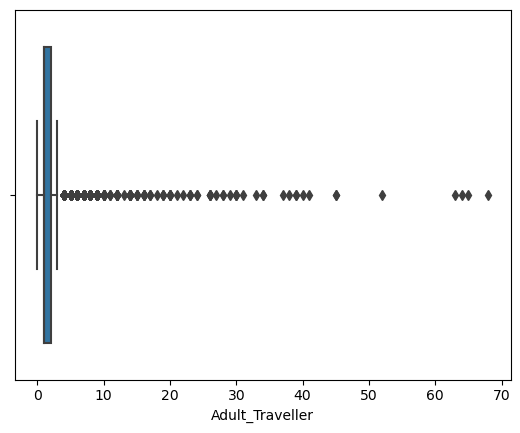

In [42]:
sns.boxplot(df["Adult_Traveller"])

<AxesSubplot:xlabel='Rezervasyon', ylabel='Gender'>

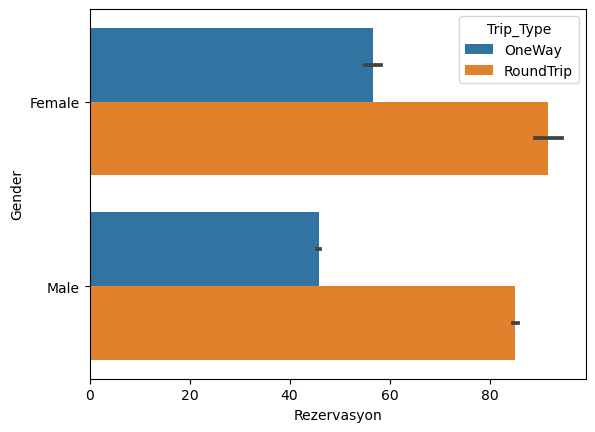

In [297]:
sns.barplot(x="Rezervasyon",y="Gender",data=df,hue="Trip_Type")

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip_Type                    199994 non-null  category      
 1   Departure_Airport_Code       199994 non-null  category      
 2   Arrival_Airport_Code         199994 non-null  category      
 3   Leisure_Ethnic               199994 non-null  category      
 4   Origin_Destination           199994 non-null  category      
 5   BookingDate                  199994 non-null  datetime64[ns]
 6   Departure_Date_Utc_Outgoing  199994 non-null  datetime64[ns]
 7   Arrive_Date_Utc_Outgoing     199994 non-null  datetime64[ns]
 8   Agent_Category               199994 non-null  category      
 9   Airline_Code                 199994 non-null  category      
 10  Adult_Traveller              199994 non-null  int64         
 11  Child_Traveller           

<AxesSubplot:xlabel='Rezervasyon', ylabel='Leisure_Ethnic'>

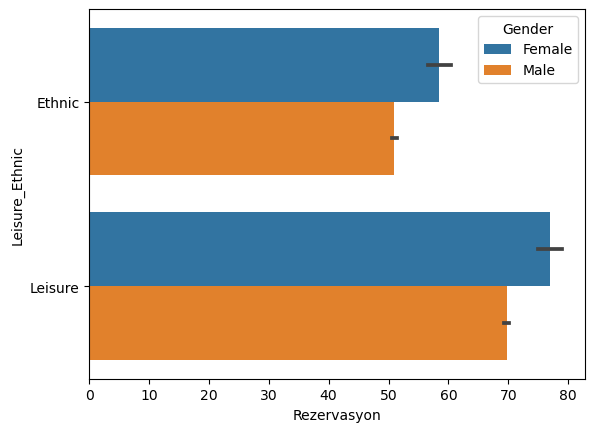

In [300]:
sns.barplot(x="Rezervasyon",y="Leisure_Ethnic",data=df,hue="Gender")

In [153]:
df_for_scatter=df[["Rezervasyon","Amount_Total_Outgoing","Gender"]]

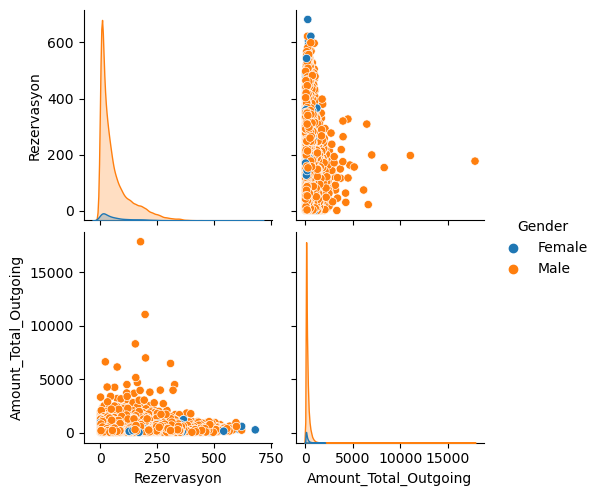

In [154]:
sns.pairplot(data=df_for_scatter,hue="Gender")

<AxesSubplot:xlabel='Gender', ylabel='Rezervasyon'>

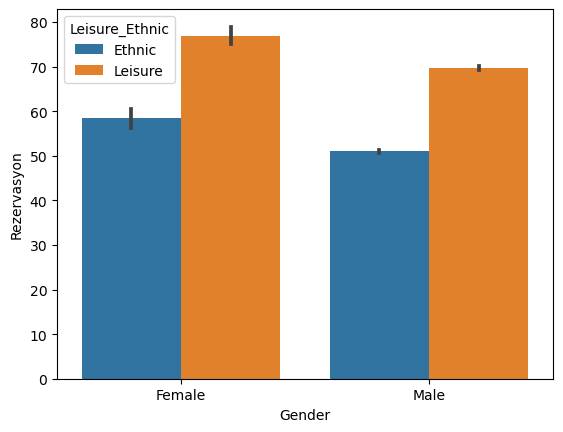

In [48]:
sns.barplot(x="Gender",y="Rezervasyon",data=df,hue="Leisure_Ethnic")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip_Type                    199994 non-null  category      
 1   Departure_Airport_Code       199994 non-null  category      
 2   Arrival_Airport_Code         199994 non-null  category      
 3   Leisure_Ethnic               199994 non-null  category      
 4   Origin_Destination           199994 non-null  category      
 5   BookingDate                  199994 non-null  datetime64[ns]
 6   Departure_Date_Utc_Outgoing  199994 non-null  datetime64[ns]
 7   Arrive_Date_Utc_Outgoing     199994 non-null  datetime64[ns]
 8   Agent_Category               199994 non-null  category      
 9   Airline_Code                 199994 non-null  category      
 10  Adult_Traveller              199994 non-null  int64         
 11  Child_Traveller           

<AxesSubplot:xlabel='Trip_Type', ylabel='Rezervasyon'>

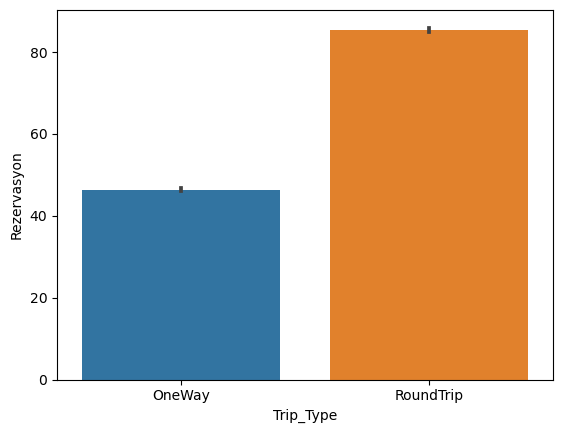

In [53]:
sns.barplot(x="Trip_Type",y="Rezervasyon",data=df)

<AxesSubplot:xlabel='Trip_Type', ylabel='Rezervasyon'>

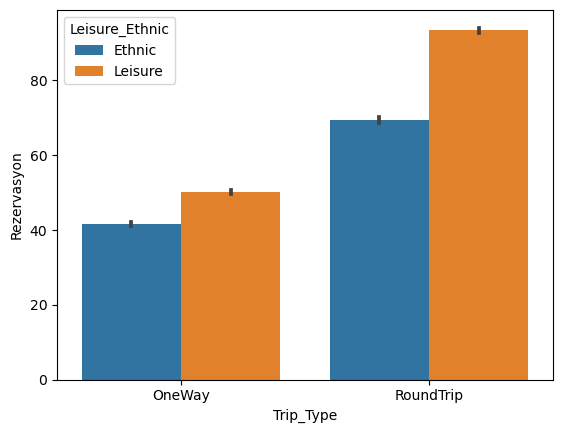

In [52]:
sns.barplot(x="Trip_Type",y="Rezervasyon",data=df,hue="Leisure_Ethnic")

<AxesSubplot:xlabel='Leisure_Ethnic', ylabel='Rezervasyon'>

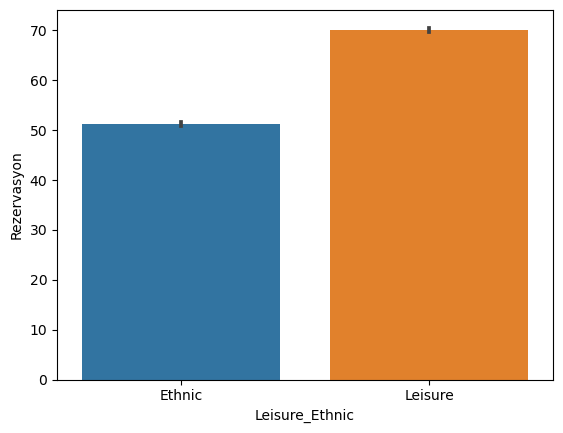

In [159]:
sns.barplot(x="Leisure_Ethnic",y="Rezervasyon",data=df)

In [75]:
df_OneWay=df[df["Trip_Type"]=="OneWay"]
df_RoundTrip=df[df["Trip_Type"]=="RoundTrip"]

In [76]:
df_RoundTrip.head()

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour,yaşgurubu
0,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male,160,18,4.58,4.83,adults
1,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male,156,7,2.75,3.00,genc yetişkin
4,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male,6,4,3.33,3.75,adults
5,RoundTrip,DUS,ADB,Ethnic,Origin_To_Destination,2021-11-28 13:41:02.520,2021-12-29 16:45:00,2021-12-29 20:00:00,B2C,XC,4,0,0,195.80,2022-01-04 12:25:00,2022-01-04 15:45:00,431.36,Düsseldorf,Germany,İzmir,Turkey,24,Germany,Male,32,6,3.25,3.33,adults
6,RoundTrip,HAJ,AYT,Leisure,Origin_To_Destination,2021-05-27 01:46:13.540,2021-05-29 22:05:00,2021-05-30 01:35:00,B2C,XC,3,0,0,492.39,2021-06-06 15:00:00,2021-06-06 18:40:00,266.04,Hannover,Germany,Antalya,Turkey,37,Germany,Male,3,8,3.50,3.67,adults


In [81]:
df_OneWay["Departure_Airport_Country"].value_counts() #bunlara göre saydır

Turkey            45583
Germany           41790
Spain              7970
Netherlands        5059
Greece             3941
Switzerland        3662
Belgium            1902
Austria            1698
Poland             1253
United Kingdom     1139
Egypt              1067
Portugal            680
Italy               488
Denmark             392
Morocco             246
Russia              104
Kazakhstan           28
Cyprus               24
Romania               6
Name: Departure_Airport_Country, dtype: int64

In [78]:
df_RoundTrip.head()

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour,yaşgurubu
0,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male,160,18,4.58,4.83,adults
1,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male,156,7,2.75,3.00,genc yetişkin
4,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male,6,4,3.33,3.75,adults
5,RoundTrip,DUS,ADB,Ethnic,Origin_To_Destination,2021-11-28 13:41:02.520,2021-12-29 16:45:00,2021-12-29 20:00:00,B2C,XC,4,0,0,195.80,2022-01-04 12:25:00,2022-01-04 15:45:00,431.36,Düsseldorf,Germany,İzmir,Turkey,24,Germany,Male,32,6,3.25,3.33,adults
6,RoundTrip,HAJ,AYT,Leisure,Origin_To_Destination,2021-05-27 01:46:13.540,2021-05-29 22:05:00,2021-05-30 01:35:00,B2C,XC,3,0,0,492.39,2021-06-06 15:00:00,2021-06-06 18:40:00,266.04,Hannover,Germany,Antalya,Turkey,37,Germany,Male,3,8,3.50,3.67,adults


In [90]:
df_OneWay[df_OneWay["Adult_Traveller"]>9]

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour,yaşgurubu,prive_perhour
8395,OneWay,HAJ,PMI,Leisure,Origin_To_Destination,2021-10-07 12:24:00.000,2021-10-24 03:00:00,2021-10-24 05:30:00,B2C,XR,16,0,0,1326.08,1900-01-01,1900-01-01,0.0,Hannover,Germany,Palma De Mallorca,Spain,26,Germany,Male,17,0,2.50,0.0,adults,530.432000
18692,OneWay,FMO,PMI,Leisure,Origin_To_Destination,2021-08-25 08:28:00.000,2022-09-08 04:40:00,2022-09-08 07:05:00,B2C,XR,11,0,0,1021.68,1900-01-01,1900-01-01,0.0,Munster,Germany,Palma De Mallorca,Spain,26,Turkey,Female,379,0,2.42,0.0,adults,422.181818
25101,OneWay,ZRH,HER,Leisure,Origin_To_Destination,2021-06-23 09:46:00.000,2021-08-06 17:00:00,2021-08-06 17:00:00,B2C,XR,10,0,0,1450.00,1900-01-01,1900-01-01,0.0,Zurich,Switzerland,Heraklion,Greece,26,Switzerland,Male,45,0,0.00,0.0,adults,inf
30652,OneWay,HAJ,PMI,Leisure,Origin_To_Destination,2022-03-10 09:48:00.000,2022-09-23 04:00:00,2022-09-23 06:30:00,B2C,XR,52,0,0,11064.04,1900-01-01,1900-01-01,0.0,Hannover,Germany,Palma De Mallorca,Spain,25,Turkey,Male,197,0,2.50,0.0,adults,4425.616000
37553,OneWay,LPA,BSL,Leisure,Destination_To_Origin,2021-07-15 14:12:00.000,2022-02-19 10:55:00,2022-02-19 15:20:00,B2C,XR,26,0,0,2080.00,1900-01-01,1900-01-01,0.0,Las Palmas,Spain,Basel,Switzerland,26,Turkey,Male,219,0,4.42,0.0,adults,470.588235
41325,OneWay,BER,HER,Leisure,Origin_To_Destination,2021-04-05 09:02:00.000,2021-09-06 08:15:00,2021-09-06 11:20:00,B2C,XR,65,0,0,8313.50,1900-01-01,1900-01-01,0.0,Berlin,Germany,Heraklion,Greece,26,Germany,Male,154,0,3.08,0.0,adults,2699.188312
48090,OneWay,ADB,BER,Ethnic,Destination_To_Origin,2021-11-10 14:07:00.000,2021-11-29 05:10:00,2021-11-29 08:15:00,B2C,XC,12,0,0,900.00,1900-01-01,1900-01-01,0.0,İzmir,Turkey,Berlin,Germany,26,Turkey,Male,19,0,3.08,0.0,adults,292.207792
54061,OneWay,DUS,PMI,Leisure,Origin_To_Destination,2022-03-28 10:56:00.000,2022-05-22 12:10:00,2022-05-22 14:25:00,B2C,XR,14,0,0,1018.78,1900-01-01,1900-01-01,0.0,Düsseldorf,Germany,Palma De Mallorca,Spain,25,Turkey,Male,56,0,2.25,0.0,adults,452.791111
54726,OneWay,BSL,HER,Leisure,Origin_To_Destination,2021-05-12 17:57:00.000,2021-07-02 04:00:00,2021-07-02 06:55:00,B2C,XR,18,0,0,1170.00,1900-01-01,1900-01-01,0.0,Basel,Switzerland,Heraklion,Greece,26,Turkey,Male,51,0,2.92,0.0,adults,400.684932
95479,OneWay,AYT,WAW,Leisure,Destination_To_Origin,2021-06-23 14:56:00.000,2021-06-26 04:15:00,2021-06-26 07:10:00,B2C,XC,20,0,0,2001.80,1900-01-01,1900-01-01,0.0,Antalya,Turkey,Warsaw,Poland,26,Turkey,Male,3,0,2.92,0.0,adults,685.547945


In [95]:
df_OneWay[df_OneWay["Rezervasyon"]>0]

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour,yaşgurubu,prive_perhour
2,OneWay,ADB,MUC,Ethnic,Destination_To_Origin,2021-08-24 02:40:55.867,2021-09-11 05:10:00,2021-09-11 07:55:00,B2C,XC,2,0,0,393.98,1900-01-01,1900-01-01,0.0,İzmir,Turkey,Munich,Germany,23,Turkey,Male,19,0,2.75,0.0,genc yetişkin,143.265455
3,OneWay,TFS,CGN,Leisure,Destination_To_Origin,2021-10-11 21:53:35.860,2021-12-10 10:40:00,2021-12-10 15:10:00,B2C,XR,1,0,0,95.99,1900-01-01,1900-01-01,0.0,Tenerife,Spain,Cologne,Germany,52,Germany,Female,60,0,4.50,0.0,adults,21.331111
7,OneWay,DUS,ADB,Ethnic,Origin_To_Destination,2021-08-19 11:48:50.750,2021-08-20 08:50:00,2021-08-20 08:50:00,B2C,XC,1,0,0,167.99,1900-01-01,1900-01-01,0.0,Düsseldorf,Germany,İzmir,Turkey,24,Germany,Male,1,0,0.00,0.0,adults,inf
8,OneWay,DUS,AYT,Leisure,Origin_To_Destination,2022-02-11 12:57:49.967,2022-02-12 08:50:00,2022-02-12 12:20:00,B2C,XC,1,0,0,145.99,1900-01-01,1900-01-01,0.0,Düsseldorf,Germany,Antalya,Turkey,50,Netherlands,Male,1,0,3.50,0.0,adults,41.711429
9,OneWay,ADB,STR,Ethnic,Destination_To_Origin,2021-12-04 16:43:24.673,2022-08-27 10:50:00,2022-08-27 13:50:00,B2C,XC,2,1,0,479.57,1900-01-01,1900-01-01,0.0,İzmir,Turkey,Stuttgart,Germany,33,Germany,Male,266,0,3.00,0.0,adults,159.856667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199992,OneWay,AYT,FMO,Leisure,Destination_To_Origin,2021-09-08 09:07:15.863,2021-09-10 19:50:00,2021-09-10 23:35:00,B2C,XC,1,0,0,96.99,1900-01-01,1900-01-01,0.0,Antalya,Turkey,Munster,Germany,48,Germany,Male,3,0,3.75,0.0,adults,25.864000
199996,OneWay,ACE,CGN,Leisure,Destination_To_Origin,2021-10-28 09:40:03.820,2021-12-08 10:30:00,2021-12-08 14:50:00,B2C,XR,1,0,0,39.99,1900-01-01,1900-01-01,0.0,Lanzarote Island,Spain,Cologne,Germany,40,Germany,Male,42,0,4.33,0.0,adults,9.235566
199997,OneWay,ADB,STR,Ethnic,Destination_To_Origin,2021-05-17 08:58:28.563,2021-07-09 12:10:00,2021-07-09 15:10:00,B2C,XC,1,0,1,104.99,1900-01-01,1900-01-01,0.0,İzmir,Turkey,Stuttgart,Germany,35,Germany,Male,54,0,3.00,0.0,adults,34.996667
199998,OneWay,MUC,ESB,Ethnic,Origin_To_Destination,2021-08-06 09:31:56.630,2021-08-08 10:20:00,2021-08-08 10:20:00,OTA,XC,1,0,0,197.99,1900-01-01,1900-01-01,0.0,Munich,Germany,Ankara,Turkey,35,Germany,Male,3,0,0.00,0.0,adults,inf


<AxesSubplot:xlabel='Rezervasyon', ylabel='prive_perhour'>

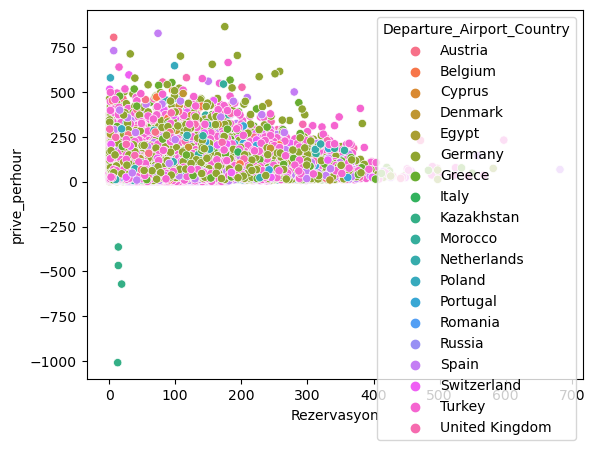

In [96]:
sns.scatterplot(data=df_OneWay[df_OneWay["Adult_Traveller"]<9] ,x="Rezervasyon",y="prive_perhour",hue="Departure_Airport_Country") #flıght suresıne boldurup ona gore top 5 ülke için bkaılabilir

<AxesSubplot:xlabel='Rezervasyon', ylabel='prive_perhour'>

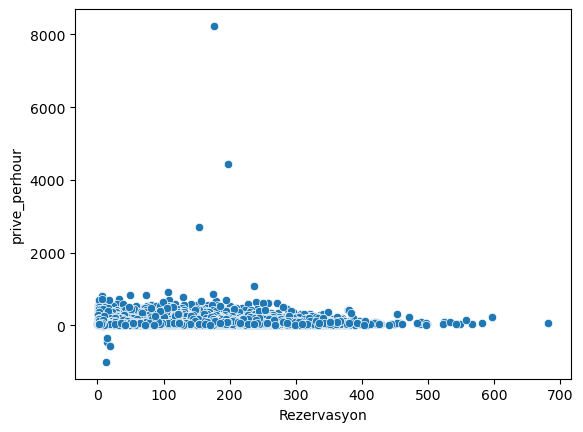

In [67]:
sns.scatterplot(data=df_OneWay ,x="Rezervasyon",y="prive_perhour") #flıght suresıne boldurup ona gore 

In [83]:
df_OneWay["prive_perhour"]=df_OneWay["Amount_Total_Outgoing"]/df_OneWay["Flight_Time_Outgoing_hour"]

C:\Users\anili\AppData\Local\Temp\ipykernel_13208\2544202196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OneWay["prive_perhour"]=df_OneWay["Amount_Total_Outgoing"]/df_OneWay["Flight_Time_Outgoing_hour"]


<AxesSubplot:xlabel='Rezervasyon', ylabel='Amount_Total_Outgoing'>

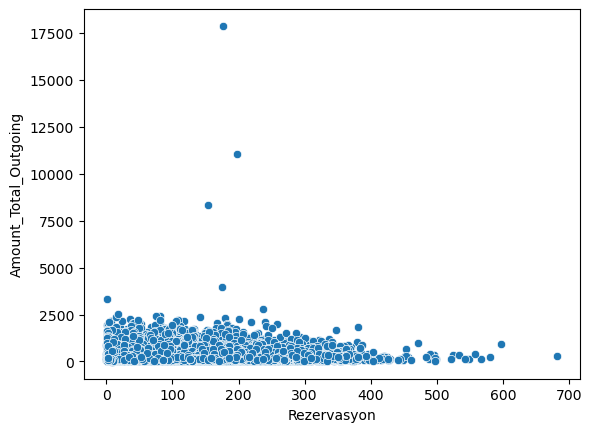

In [63]:
sns.scatterplot(data=df_OneWay ,x="Rezervasyon",y="Amount_Total_Outgoing") #flıght suresıne boldurup ona gore 

In [93]:
df_OneWay["Amount_Total_Outgoing"].sort_values()
df_OneWay=df_OneWay[df_OneWay["Amount_Total_Outgoing"]>0]

<AxesSubplot:ylabel='Amount_Total_Outgoing'>

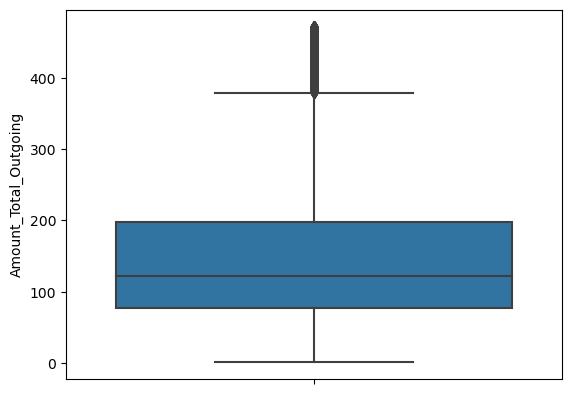

In [204]:
sns.boxplot( y=df_OneWay["Amount_Total_Outgoing"] )

In [68]:
    #lower quartile
    Q1=df_OneWay["prive_perhour"].quantile(0.25) 
    #upper quartile
    Q3=df_OneWay["prive_perhour"].quantile(0.75) 
    #inter-quartile-range
    IQR=Q3-Q1 
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)
    df_OneWay= df_OneWay[df_OneWay["prive_perhour"]< Upper_Whisker]
    df_OneWay= df_OneWay[df_OneWay["prive_perhour"]> Lower_Whisker]

25.084805653710244
114.66996450029654
89.5851588465863
-109.2929326161692 249.047702770176


In [203]:
#lower quartile
Q1=df_OneWay["Rezervasyon"].quantile(0.25) 
#upper quartile
Q3=df_OneWay["Rezervasyon"].quantile(0.75) 
#inter-quartile-range
IQR=Q3-Q1 
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
df_OneWay= df_OneWay[df_OneWay["Rezervasyon"]< Upper_Whisker]
df_OneWay= df_OneWay[df_OneWay["Rezervasyon"]> Lower_Whisker]
                     

6.0
44.0
38.0
-51.0 101.0


In [221]:
df_Road_Trip["Amount_Total_Outgoing"].sort_values()
df_Road_Trip=df_Road_Trip[df_Road_Trip["Amount_Total_Outgoing"]>0]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199994 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Trip_Type                    199994 non-null  category      
 1   Departure_Airport_Code       199994 non-null  category      
 2   Arrival_Airport_Code         199994 non-null  category      
 3   Leisure_Ethnic               199994 non-null  category      
 4   Origin_Destination           199994 non-null  category      
 5   BookingDate                  199994 non-null  datetime64[ns]
 6   Departure_Date_Utc_Outgoing  199994 non-null  datetime64[ns]
 7   Arrive_Date_Utc_Outgoing     199994 non-null  datetime64[ns]
 8   Agent_Category               199994 non-null  category      
 9   Airline_Code                 199994 non-null  category      
 10  Adult_Traveller              199994 non-null  int64         
 11  Child_Traveller           

<AxesSubplot:xlabel='Rezervasyon', ylabel='Amount_Total_Incoming'>

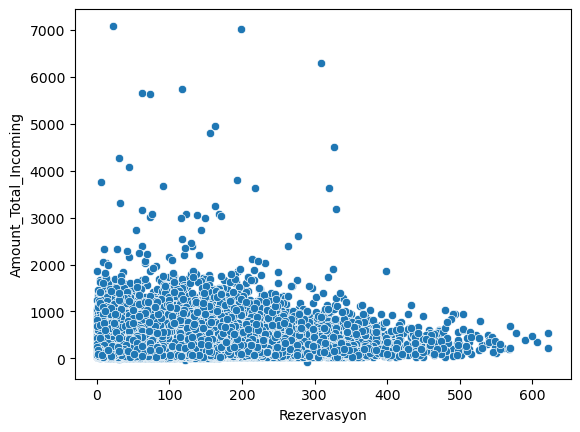

In [225]:
sns.scatterplot(data=df_Road_Trip ,x="Rezervasyon",y="Amount_Total_Incoming")

In [223]:
    #lower quartile
    Q1=df_OneWay["Amount_Total_Outgoing"].quantile(0.25) 
    #upper quartile
    Q3=df_OneWay["Amount_Total_Outgoing"].quantile(0.75) 
    #inter-quartile-range
    IQR=Q3-Q1 
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)
    df_OneWay= df_OneWay[df_OneWay["Amount_Total_Outgoing"]< Upper_Whisker]
    df_OneWay= df_OneWay[df_OneWay["Amount_Total_Outgoing"]> Lower_Whisker]

81.99
237.98
155.99
-151.995 471.96500000000003


In [224]:
#lower quartile
Q1=df_OneWay["Rezervasyon"].quantile(0.25) 
#upper quartile
Q3=df_OneWay["Rezervasyon"].quantile(0.75) 
#inter-quartile-range
IQR=Q3-Q1 
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
df_OneWay= df_OneWay[df_OneWay["Rezervasyon"]< Upper_Whisker]
df_OneWay= df_OneWay[df_OneWay["Rezervasyon"]> Lower_Whisker]
                     

7.0
56.0
49.0
-66.5 129.5


In [56]:
df.head()

,Trip_Type,Departure_Airport_Code,Arrival_Airport_Code,Leisure_Ethnic,Origin_Destination,BookingDate,Departure_Date_Utc_Outgoing,Arrive_Date_Utc_Outgoing,Agent_Category,Airline_Code,Adult_Traveller,Child_Traveller,Infant_Traveller,Amount_Total_Outgoing,Departure_Date_Utc_Incoming,Arrive_Date_Utc_Incoming,Amount_Total_Incoming,Departure_Airport_City,Departure_Airport_Country,Arrival_Airport_City,Arrival_Airport_Country,Age,Country,Gender,Rezervasyon,holiday_time,Flight_Time_Outgoing_hour,Flight_Time_İncoming_hour,yaşgurubu
0,RoundTrip,LPA,HAJ,Leisure,Destination_To_Origin,2021-10-01 13:12:01.790,2022-03-09 17:55:00,2022-03-09 22:30:00,B2C,XR,2,0,0,34.98,2022-03-27 03:00:00,2022-03-27 07:50:00,263.92,Las Palmas,Spain,Hannover,Germany,61,Spain,Male,160,18,4.58,4.83,adults
1,RoundTrip,VIE,AYT,Leisure,Origin_To_Destination,2022-03-06 09:48:04.167,2022-08-09 07:55:00,2022-08-09 10:40:00,OTA,XC,2,0,0,211.36,2022-08-16 04:00:00,2022-08-16 07:00:00,221.08,Viyana,Austria,Antalya,Turkey,19,Austria,Male,156,7,2.75,3.00,genc yetişkin
2,OneWay,ADB,MUC,Ethnic,Destination_To_Origin,2021-08-24 02:40:55.867,2021-09-11 05:10:00,2021-09-11 07:55:00,B2C,XC,2,0,0,393.98,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,İzmir,Turkey,Munich,Germany,23,Turkey,Male,19,0,2.75,0.00,genc yetişkin
3,OneWay,TFS,CGN,Leisure,Destination_To_Origin,2021-10-11 21:53:35.860,2021-12-10 10:40:00,2021-12-10 15:10:00,B2C,XR,1,0,0,95.99,1900-01-01 00:00:00,1900-01-01 00:00:00,0.00,Tenerife,Spain,Cologne,Germany,52,Germany,Female,60,0,4.50,0.00,adults
4,RoundTrip,DUS,ESB,Ethnic,Origin_To_Destination,2021-12-18 15:44:09.123,2021-12-23 20:00:00,2021-12-23 23:20:00,B2C,XC,1,0,0,204.64,2021-12-27 01:20:00,2021-12-27 05:05:00,63.89,Düsseldorf,Germany,Ankara,Turkey,24,Turkey,Male,6,4,3.33,3.75,adults


In [ ]:
df[df["Adult_Traveller"]>9]

<AxesSubplot:xlabel='yaşgurubu', ylabel='Rezervasyon'>

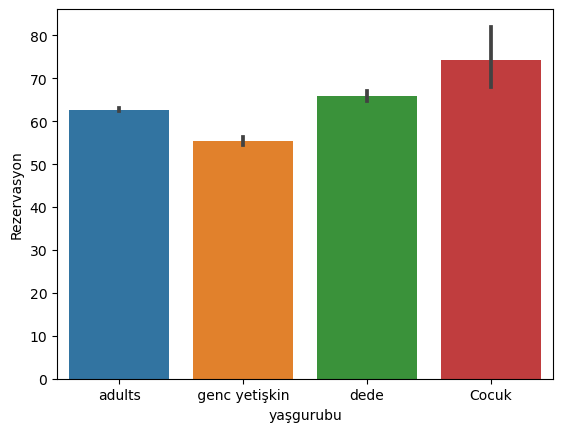

In [61]:
sns.barplot(x="yaşgurubu",y="Rezervasyon",data=df[df["Adult_Traveller"]<9])

<AxesSubplot:xlabel='yaşgurubu', ylabel='Rezervasyon'>

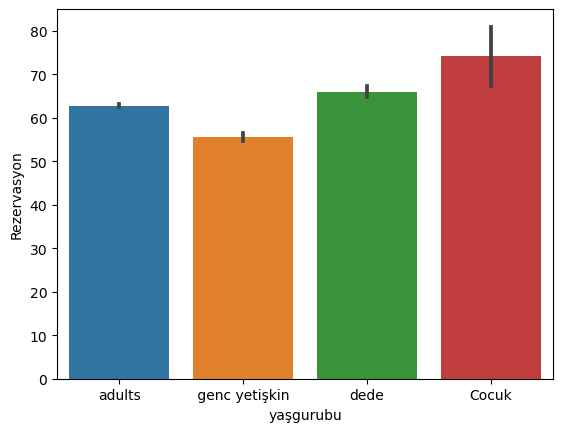

In [57]:
sns.barplot(x="yaşgurubu",y="Rezervasyon",data=df)

In [55]:
df["Age_Category"]=df["Age"].apply(age)

In [97]:
def age(x):
    if x<3:
        return "New_Born"
    if x<14:
        return "Children"
    elif 15<x<24:
        return "Youth"
    elif 23<x<65:
        return "Adults"
    elif x>65:
        return "Senior"


In [ ]:
topcity = data.city.value_counts().to_frame().reset_index()
topcity.columns = ['City','Count']
topcity = topcity[0:5]